In [23]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)

In [44]:
# dynamic effects
dynamic_file = "/share/ScratchGeneral/anncuo/OneK1K/dyn_eqtl_linear-sq_data.RDS"

In [47]:
dt = readRDS(dynamic_file)
head(dt,2)
length(unique(dt[dt$fdr_sq<0.05,]$id))

GeneID,snpid,anova,p.value,fdr,anova_sq,p.value_sq,fdr_sq,id,singular,singular_sq
<chr>,<chr>,<list>,<dbl>,<dbl>,<list>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
PPA1,10:71963608_A,"15.000000, 16.000000, -7871.558581, -7870.257037, -7771.993991, -7764.054808, 3950.779291, 3951.128519, -7901.558581, -7902.257037, NA, 0.698456, NA, 1.000000, NA, 0.403303",0.4033030,0.7946625,"16.0000000, 18.0000000, -8275.2382811, -8272.0825183, -8169.0360516, -8152.6050101, 4153.6191406, 4154.0412591, -8307.2382811, -8308.0825183, NA, 0.8442371, NA, 2.0000000, NA, 0.6556563",0.6556563,1.0000000,10:71963608_A-PPA1,FALSE,FALSE
GDI2,10:5855403_C,"15.0000000, 16.0000000, -5414.1029960, -5413.4603514, -5314.5384059, -5307.2581219, 2722.0514980, 2722.7301757, -5444.1029960, -5445.4603514, NA, 1.3573554, NA, 1.0000000, NA, 0.2439963",0.2439963,0.6506389,"16.0000000, 18.0000000, -5869.3416840, -5867.0102079, -5763.1394545, -5747.5326997, 2950.6708420, 2951.5051039, -5901.3416840, -5903.0102079, NA, 1.6685239, NA, 2.0000000, NA, 0.4341948",0.4341948,0.8882569,10:5855403_C-GDI2,FALSE,FALSE


[1] 303

In [48]:
# dynamic effects
pseudotime_file = "/share/ScratchGeneral/anncuo/OneK1K/slingshot_pseudotime.RDS"

In [49]:
pt = readRDS(pseudotime_file)
head(pt,2)

barcode,cell_type,individual,pool,latent,SCT_snn_res.0.1,pseudotime,Q4,Q5,Q6
<chr>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
AAACCTGCAACGATCT-1,B IN,686_687,pool_1,b1,0,0.09410877,Q2,Q2,Q2
AAACCTGGTCAGAATA-1,B Mem,692_693,pool_1,b1,1,0.11409837,Q4,Q5,Q6


In [50]:
ggplot(pt, aes(x = ))

[1] b1 b2
Levels: b1 b2

In [1]:
myfile = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_Bcell_eQTLs/summary.csv"

In [9]:
df = read.csv(myfile, row.names=1)

In [14]:
df[df$gene == "ORMDL3",]

,gene,n_snps,snp_id,pv_raw,pv_Bonf
,<chr>,<int>,<chr>,<dbl>,<dbl>
84,ORMDL3,2,17:38051348,0.001048378,0.002096756


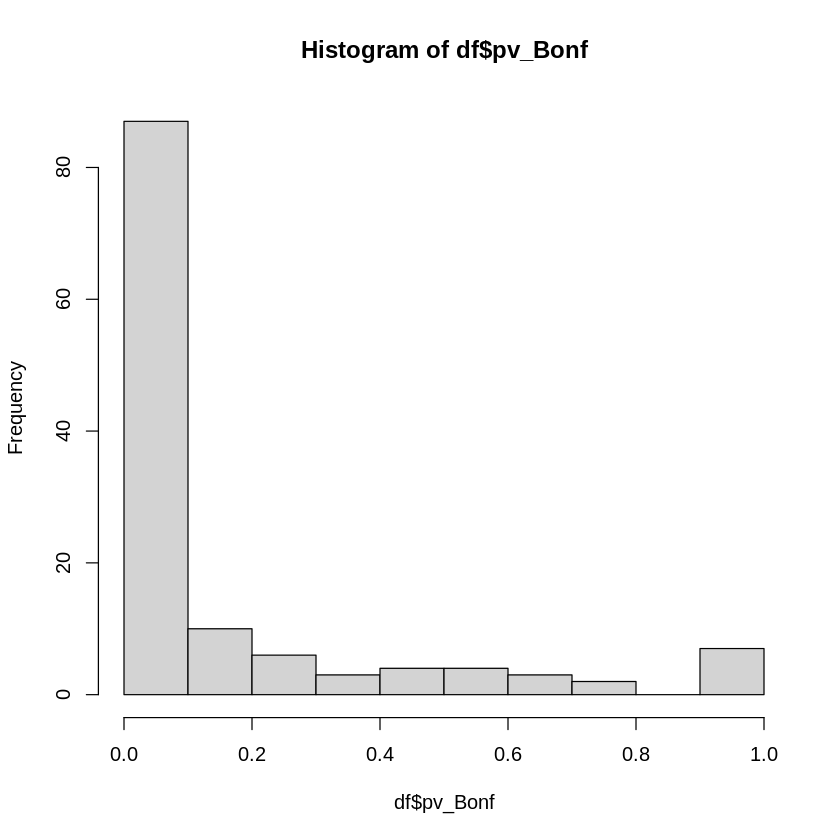

In [4]:
hist(df$pv_Bonf)

In [16]:
file1 = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_Bcell_eQTLs/betas"
df1 = read.csv(file1, row.names=1)
head(df1)

,variant41110,variant41126
,<dbl>,<dbl>
AAACCTGCAACGATCT-1,0.021115043,0.023219635
AAACCTGGTCAGAATA-1,0.080556878,0.080448780
AAACGGGAGCGTCAAG-1,0.065475480,0.063266059
AAACGGGAGGGAACGG-1,0.069929322,0.066462860
AAACGGGCAGTTCATG-1,0.041660689,0.042561457
AAACGGGGTCCCTACT-1,0.008420944,0.009986836


In [17]:
file1 = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_noplasma_Bcell_eQTLs/betas/"
df1 = read.csv(file1, row.names=1)
head(df1)

,chrom,betaG,variant
,<int>,<dbl>,<chr>
0,2,-0.01841274,2:61137506


In [23]:
file1 = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_noplasma_Bcell_eQTLs/betas/"
df1 = read.csv(file1, row.names=1)
colnames(df1) = gsub("\\.","\\:",gsub("X","",colnames(df1)))
head(df1)

,2:61137506
,<dbl>
AAACCTGCAACGATCT-1,-0.15884547
AAACCTGGTCAGAATA-1,-0.01212293
AAACGGGAGCGTCAAG-1,-0.03516532
AAACGGGAGGGAACGG-1,-0.04394153
AAACGGGCAGTTCATG-1,-0.13829936
AAACGGGGTCCCTACT-1,-0.11171419


In [1]:
# Seurat object
mydir = "/share/ScratchGeneral/anncuo/OneK1K/"
sce_filename = paste0(mydir,"cell_type.RDS")

In [2]:
sce = readRDS(sce_filename)
sce

Loading required package: Seurat

Attaching SeuratObject



An object of class Seurat 
57641 features across 1272489 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [3]:
## Metadata
metadata_filename =  paste0(mydir,"/metadata.RDS")
df = readRDS(metadata_filename)

In [4]:
### B cells
B_cell_types = unique(as.character(df$cell_type))[grep("B cell", unique(as.character(df$cell_type)))]
B_cell_types

[1] "TCL1A+ FCER2+ B cell" "TCL1A- FCER2- B cell" "IgJ+ B cell"

In [5]:
B_cells_no_plasma = B_cell_types[grep("TCL1A", B_cell_types)]
B_cells_no_plasma

[1] "TCL1A+ FCER2+ B cell" "TCL1A- FCER2- B cell"

In [6]:
df_B_np = df[df$cell_type %in% B_cells_no_plasma,]
nrow(df_B_np)
head(df_B_np,2)

[1] 130091

,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>,<chr>,<dbl>,<chr>
AAACCTGCAACGATCT-1,onek1k,3847,884,pool_1,686_687,3.717182,b1,3756,883,TCL1A+ FCER2+ B cell,1,B,0.8730781,B naive
AAACCTGGTCAGAATA-1,onek1k,4028,1097,pool_1,692_693,3.202582,b1,3811,1095,TCL1A- FCER2- B cell,1,B,0.9379463,B intermediate


In [7]:
B_cells = colnames(sce)[colnames(sce) %in% rownames(df_B_np)]
length(B_cells)
head(B_cells)

[1] 130091

[1] "AAACCTGCAACGATCT-1" "AAACCTGGTCAGAATA-1" "AAACGGGAGCGTCAAG-1"
[4] "AAACGGGAGGGAACGG-1" "AAACGGGCAGTTCATG-1" "AAACGGGGTCCCTACT-1"

In [8]:
sce_B = sce[,colnames(sce) %in% B_cells]
sce_B

An object of class Seurat 
57641 features across 130091 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [9]:
##### PCA

In [14]:
sce_B = RunPCA(sce_B)

PC_ 1 
Positive:  GNLY, S100A9, S100A8, NKG7, LYZ, CCL5, S100A4, TYROBP, B2M, KLRB1 
	   IL32, CST3, TMSB4X, GZMB, CST7, GZMA, FGFBP2, GZMH, FCER1G, S100A6 
	   HCST, CTSW, CMC1, SRGN, CCL4, CD7, CD3D, ACTB, PRF1, ID2 
Negative:  CD74, HLA-DRA, CD79A, IGLL5, HLA-DPB1, HLA-DRB1, HLA-DPA1, MS4A1, CD79B, HLA-DQB1 
	   TCL1A, HLA-DQA1, LINC00926, HLA-DRB5, MEF2C, VPREB3, FCER2, BANK1, CD37, RP5-887A10.1 
	   AL928768.3, HLA-DMB, HLA-DMA, CD22, HLA-DQA2, BLK, MARCH1, AC079767.4, ADAM28, ARHGAP24 
PC_ 2 
Positive:  IGLL5, AL928768.3, IGJ, S100A9, GNLY, S100A8, LYZ, NKG7, CCL5, B2M 
	   S100A4, TYROBP, RP5-887A10.1, APOD, S100A6, LGALS1, CST3, KLRB1, ACTB, TMSB4X 
	   S100A10, GZMB, ACTG1, CRIP1, CST7, FCER1G, GAPDH, FGFBP2, IL32, GZMA 
Negative:  CD74, HLA-DRA, HLA-DRB1, HLA-DPB1, HLA-DPA1, CD79A, HLA-DQB1, TCL1A, MS4A1, CD79B 
	   MEF2C, FCER2, LINC00926, HLA-DQA1, HLA-DRB5, CD22, VPREB3, CD37, ADAM28, HLA-DMA 
	   MARCH1, MACROD2, HLA-DMB, AC079767.4, HLA-DQA2, BANK1, PHACTR1, RPL18A, TSPA

In [15]:
pca_df = as.data.frame(Embeddings(sce_B, reduction = "pca"))
dim(pca_df)
head(pca_df)

[1] 130091     50

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCTGCAACGATCT-1,-37.98551,-8.686381,9.0947819,0.8663803,5.103624,10.868219,3.2251869,-0.93214578,-2.513557,-2.778365,⋯,-1.2833400,-0.9346849,-1.5595240,-1.9736893,-1.1936258,-0.3442753,-4.379464,-0.2961269,1.3945444,1.0891876
AAACCTGGTCAGAATA-1,-22.77593,-4.031883,-8.6517215,-2.8816035,2.052915,-1.110556,-0.7029045,0.09782488,5.819998,-6.608984,⋯,1.6002528,0.1163323,-3.0627312,-1.7462392,4.3300210,1.0979777,-1.913879,-1.8551902,1.6858416,-2.9780184
AAACGGGAGCGTCAAG-1,-19.19531,-4.261200,0.4867069,-7.5110830,-2.056438,-4.980153,-0.7418286,-0.80843026,6.163497,3.844470,⋯,0.1279257,0.3049705,-1.1901872,-2.4381299,-0.7733191,-0.3245179,1.321271,4.1853534,1.8204304,0.1862208
AAACGGGAGGGAACGG-1,-25.24272,38.625514,1.8953909,-7.5533989,2.750394,-8.208492,-0.3476790,2.87614662,-8.319364,-2.612886,⋯,-1.9940143,0.3874101,3.6338540,-2.4773256,0.4881522,-0.4848437,1.531129,-0.4060404,-2.5161919,1.3083952
AAACGGGCAGTTCATG-1,-36.35498,-8.280076,7.3136504,-1.7996415,4.063108,6.250331,0.2718679,-0.15916262,-1.555386,-1.850074,⋯,-2.3272383,-1.1902761,4.9435476,1.0739534,-2.3940962,11.7887530,-4.567436,2.3299461,0.9287978,-4.7502772
AAACGGGGTCCCTACT-1,-32.68352,-2.490285,8.0703262,-0.4885047,4.271295,11.397732,0.4248083,-12.59138913,2.176615,2.339691,⋯,-0.4317668,-0.3512896,-0.5768831,-0.0919147,0.1637415,-0.8389378,-1.120883,-2.0430337,-0.4657971,-1.9232836


In [17]:
df = pca_df[,c("PC_1","PC_2")]
df$cell = rownames(df)
head(df)

,PC_1,PC_2,cell
,<dbl>,<dbl>,<chr>
AAACCTGCAACGATCT-1,-37.98551,-8.686381,AAACCTGCAACGATCT-1
AAACCTGGTCAGAATA-1,-22.77593,-4.031883,AAACCTGGTCAGAATA-1
AAACGGGAGCGTCAAG-1,-19.19531,-4.261200,AAACGGGAGCGTCAAG-1
AAACGGGAGGGAACGG-1,-25.24272,38.625514,AAACGGGAGGGAACGG-1
AAACGGGCAGTTCATG-1,-36.35498,-8.280076,AAACGGGCAGTTCATG-1
AAACGGGGTCCCTACT-1,-32.68352,-2.490285,AAACGGGGTCCCTACT-1


In [18]:
df1$cell = rownames(df1)
head(df1)

,variant41110,variant41126,cell
,<dbl>,<dbl>,<chr>
AAACCTGCAACGATCT-1,0.021115043,0.023219635,AAACCTGCAACGATCT-1
AAACCTGGTCAGAATA-1,0.080556878,0.080448780,AAACCTGGTCAGAATA-1
AAACGGGAGCGTCAAG-1,0.065475480,0.063266059,AAACGGGAGCGTCAAG-1
AAACGGGAGGGAACGG-1,0.069929322,0.066462860,AAACGGGAGGGAACGG-1
AAACGGGCAGTTCATG-1,0.041660689,0.042561457,AAACGGGCAGTTCATG-1
AAACGGGGTCCCTACT-1,0.008420944,0.009986836,AAACGGGGTCCCTACT-1


In [20]:
df2 = inner_join(df,df1)
nrow(df2)
head(df2,2)

Joining, by = "cell"


[1] 130091

,PC_1,PC_2,cell,variant41110,variant41126
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,-37.98551,-8.686381,AAACCTGCAACGATCT-1,0.02111504,0.02321963
2,-22.77593,-4.031883,AAACCTGGTCAGAATA-1,0.08055688,0.08044878


In [28]:
## Metadata
metadata_filename =  paste0(mydir,"/metadata.RDS")
df_meta = readRDS(metadata_filename)
df_meta$cell = rownames(df_meta)
df0 = df_meta[,c("cell","cell_type")]
head(df0,2)

,cell,cell_type
,<chr>,<fct>
AAACCTGAGAATGTTG-1,AAACCTGAGAATGTTG-1,CD4+ KLRB1+ T cell
AAACCTGAGAGAACAG-1,AAACCTGAGAGAACAG-1,XCL1- NK


In [29]:
df3 = inner_join(df0,df2)

Joining, by = "cell"


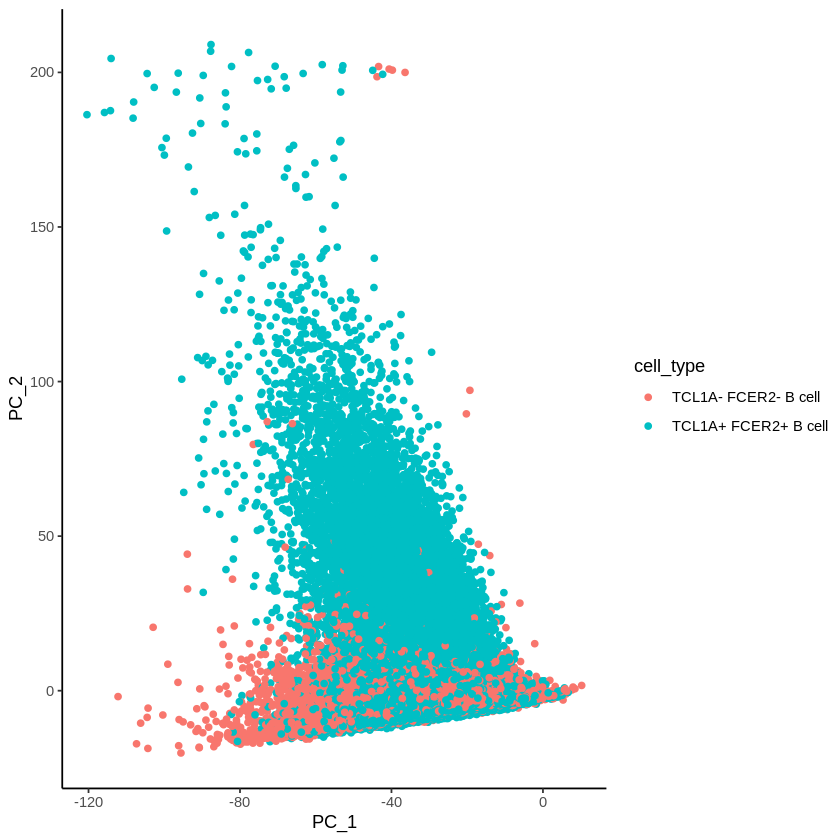

In [30]:
p = ggplot(df3, aes(x=PC_1, y=PC_2, colour=cell_type)) + geom_point() + theme_classic() 
p

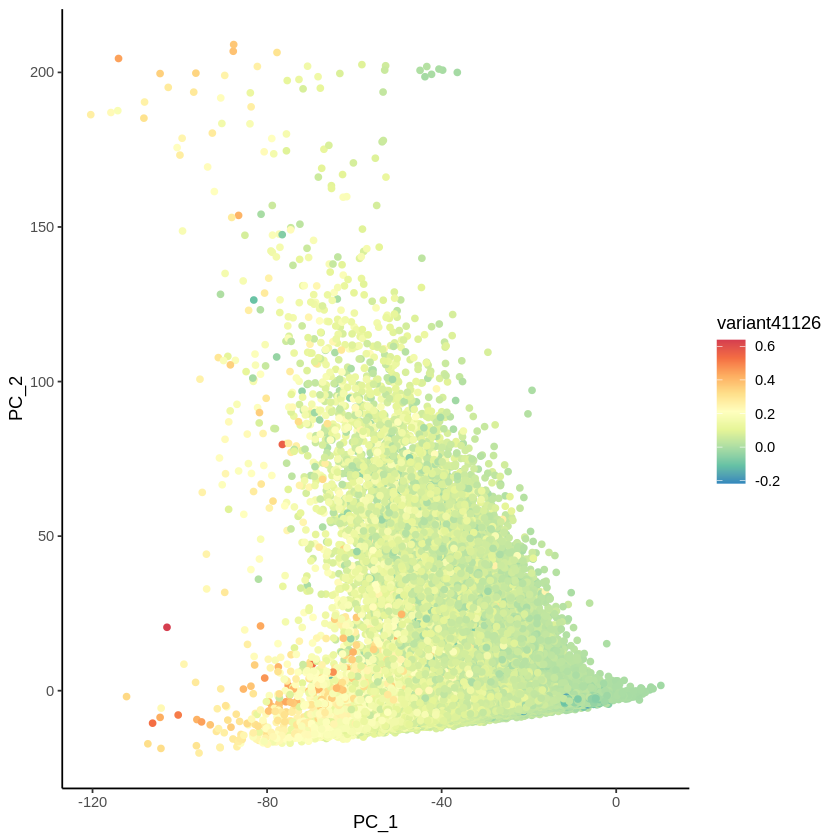

In [26]:
p = ggplot(df3, aes(x=PC_1, y=PC_2, colour=variant41126)) + geom_point() + theme_classic() 
p = p + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
p

In [ ]:
### tSNE

In [ ]:
set.seed(147)
tsne <- Rtsne(t(logcounts(sce)), pca = TRUE)
head(tsne$Y)

In [ ]:
### plot

In [ ]:
pca.set = pca.500hvgs
df = data.frame(PC1 = pca.set$x[,1], PC2 = pca.set$x[,2], day = sce$day)
df = as.data.frame(cbind(df, colData(sce)))
# colnames(df)

In [ ]:
## PCA by day (Fig. 1B, S6)
perc_var <- round(summary(pca.set)$importance[2,]*100, 1)
p = ggplot(df, aes(x = as.numeric(PC1), y = as.numeric(PC2), colour = as.factor(day)))
p = p + geom_point(alpha = 0.2, size = 0.8) #+ ggtitle("PCA, top 500 hvgs")
p = p + scale_color_canva(palette = "Pool party") 
p = p + theme_bw() + theme(legend.position = "none", panel.border = element_blank(), text = element_text(size = 16))
p = p + xlab(paste0("PC1, ",perc_var[1],"% variance explained")) 
p = p + ylab(paste0("PC2, ",perc_var[2],"% variance explained"))
options(repr.plot.width = 6, repr.plot.height = 4)
p

In [ ]:
plot_tsne_day <- function(tsne, sce){
    df = data.frame(comp1 = tsne$Y[,1], comp2 = tsne$Y[,2], day = sce$day)
    p = ggplot(df, aes(x = comp1, y = comp2, colour = as.factor(day)))
    p = p + geom_point(alpha = 0.2, size = 0.8) 
    p = p + scale_color_canva(palette = "Pool party") 
    p = p + theme_bw() + theme(legend.position = "none", panel.border = element_blank())
    p
}

In [ ]:
## tSNE by day (Fig. S6)
options(repr.plot.width = 4, repr.plot.height = 4)
plot_tsne_day(tsne.500hvgs, sce[rowData(sce)$is_intop500hvg,]) + ggtitle("tSNE from top 50 PCS, top 500 hvgs")